When presented with an unknown dataset, it is very common to attempt to find trends or patterns.
The most basic form of this is visual inspection - how is the data trending? Does it repeat in cycles? 
Can we predict future data given some past events? The mathematical approach to this "trend finding" is called regression.
<!-- TEASER_END -->

First, the import statements.

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt
%matplotlib inline

For this example problem, we will need some data. One of the best tools I have found for generating datasets is the sklearn.datasets toolbox, which features built-in datasets, dataset downloaders, and tools for generating datasets. In this case, I will use the make_regression function to generate 1000 samples, with noise and bias.

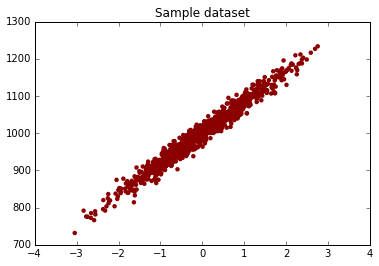

In [2]:
from sklearn import datasets 
X, y = datasets.make_regression(n_samples=1000,n_features=1,
                                n_informative=1,noise=15,
                                bias=1000,random_state=0)

_ = plt.scatter(X, y, color='darkred', marker='o', edgecolors='none')
_ = plt.title('Sample dataset')

As we can see, this data is distributed in a fairly linear fashion. But how can we discover the underlying mathematical function, without human intervention? One simple method for this is [linear regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf). In this case, we model Y with a function: 

$$Y = \theta_0 + \theta_1 x_1$$



In [3]:
#Add bias terms, so that the first column of X is all ones.
#This should make the data match the model.
X = np.hstack((np.ones((X.shape[0], 1)), X))

#Make y into a 2D array to match X
y = y[:, np.newaxis]

To fit the generic function described above to our particular dataset, we need to find values for theta that minimize some cost function, such as [mean squared error](http://people.missouristate.edu/songfengzheng/Teaching/MTH541/Lecture%20notes/evaluation.pdf).

An optimization technique known as [gradient descent](http://stat.columbia.edu/~porbanz/teaching/W4400/slides_lecture6.pdf) can be used in order to find values for theta. The easiest way to do this is to define a cost, the gradient of the cost with respect to each theta, and an update rule.  

Math. Not Even Once.
--------------------

To perform optimization by gradient descent, we will need the following formulas. In all of these formulas, h(x) is the prediction of x by the linear regressor.

Cost (m is the length of X):

$$\frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta(x^i)-y^i)^2$$


Gradient of cost with respect to theta (m is the length of X):

$$\frac{1}{m}(h_\theta(x)-y)$$


Update rule (for every j in X, m is the length of X):

$$\theta_j = \theta_j + \alpha\sum\limits_{i=1}^{m}(y^i - h_\theta(x^i))x^i_j$$

The Thicke of It
----------------

Let's define the previous statements in code, and perform gradient regression. The linear_cost and linear_cost_grad functions look slightly different - this is because the code versions are written in matrix form, but are otherwise equivalent to the versions defined above.

In [4]:
#Initialize theta to zeros                                                      
learning_rate = alpha = 0.01                                                                    
iters = 1000      

def linear_cost(theta,X,y):                                                     
    m = y.shape[0]                                                              
    return 1. / (2. * m) * np.sum((np.dot(X, theta) - y) ** 2.)                            
                                                                                
def linear_cost_grad(theta,X,y):                                                
    m = y.shape[0]                                                              
    return 1. / m * np.dot(X.T, (y - np.dot(X,theta)))                                 
                                                                                
def gradient_descent(X,y,alpha,iters):                                    
    m = y.shape[0]                                                              
    all_cost = []
    #Initialize theta to zeros
    all_theta = [np.zeros((X.shape[1],1))]
    for i in range(iters):                                                      
        all_cost.append(linear_cost(all_theta[-1], X, y))
        all_theta.append(all_theta[-1] + float(alpha) * linear_cost_grad(all_theta[-1], X, y))                       
    return all_theta,all_cost                                                       
                                                                             
#Perform linear regression via gradient descent                                
all_theta, all_cost = gradient_descent(X, y, alpha, iters)

Are We There Yet?
-----------------

With code written, how can we tell that it is functioning correctly? One way is the look at the cost over each iteration of the gradient descent algorithm. If this value is decreasing as iterations increase, the values of theta are approaching their optimimum values, as defined by minimizing the cost function. This type of optimization is known as [convex optimization](http://www.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf), which is an entire field of study to its own. Gradient regression, however, doesn't require much study. 

We have all seen gradient descent in action - water always flows downhill! At the top of the hill, the water begins to trickle downward along the slope of the hill, always following the path of steepest descent. To match the analogy, at each point, we calculate the cost and the gradient of the cost, trending down slope along the miniumum gradient. Since we computer users cannot use continuous methods, like mother nature can, we take steps, calculating the cost and cost gradient each time. This step size is set by a parameter called the learning_rate.

More advanced methods of optimization attempt to avoid local minima, using additional parameters like momentum, or different optimization methods which look at different factors, such as gradients-of-gradients. An example of local minima would be a lake on top of a mountain. The lake is the lowest nearby point when compared to the peak, but the bottom of the mountain is much lower than the lake itself. We want to reach the bottom of the mountain, rather than being stuck in the lake. 

Now that funtime is over, let's look at a plot of cost vs. number of iterations. We can see this plot decrease, asymptotically approaching zero. The differences between stopping at iteration 400 and stopping at iteration 1000 are fairly minimal, and many algorithms use minimal decrease settings to stop iterating when the cost stops decreasing noticeably.

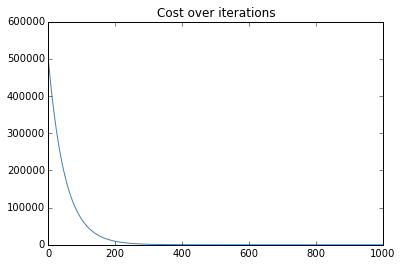

In [5]:
plt.plot(all_cost, color='steelblue')
plt.title('Cost over iterations')

There are some other ways to visualize the information seen above, such as a 2D contour plot with an overlay of the gradient path. To plot both of this, we must calculate a cost mesh across a combination of (theta0, theta1) values.

In [6]:
theta0_vals = np.linspace(-1200, 1200, 100)
theta1_vals = np.linspace(-150, 150, 100)
contours = np.array([linear_cost([theta0,theta1],X,y)
                     for theta0 in theta0_vals 
                     for theta1 in theta1_vals]).reshape((theta0_vals.shape[0],
                                                          theta1_vals.shape[0]))

The 2D plot includes gradient descent - what path was taken to arrive at the local minima? 

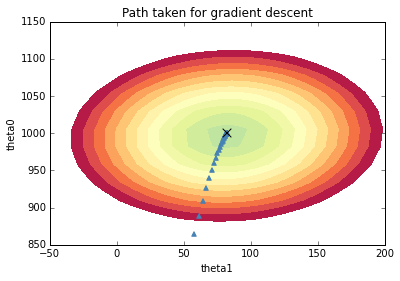

In [7]:
fig, ax = plt.subplots()
best_thetas = all_theta[-1]
#Adding best_thetas[1] to get contour plot in the correct spot
ax.contourf(theta1_vals + best_thetas[1], theta0_vals, contours, 
            np.logspace(5, 7, 50), cmap=plt.cm.Spectral_r)
ax.set_xlabel('theta1')
ax.set_ylabel('theta0')
ax.autoscale(False)
ax.set_ylim([850, 1150])
ax.set_xlim([-50, 200])
t = np.array(all_theta)
#Subsample by 20 and plot scatter points on top of contours
ax.scatter(t[::20, 1], t[::20, 0], zorder=2, color='steelblue', marker="^")
#Plot X for final theta values
ax.scatter(best_thetas[1], best_thetas[0], zorder=3, color='black', marker='x', s=75)
plt.title('Path taken for gradient descent')

Blurred Lines
-------------

With all of this in mind, let's take a look at how closely the final regression values represent the original dataset.

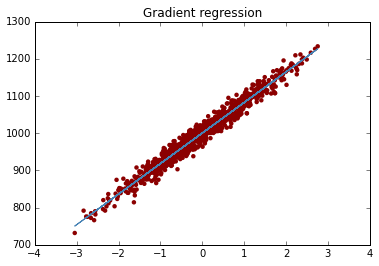

In [8]:
#Use only the second term - remember that we added a bias term earlier!
plt.scatter(X[:, 1], y, color='darkred', edgecolor='none',)
plt.plot(X[:, 1], np.dot(X, best_thetas), color='steelblue')
plt.title('Gradient regression')

As seen above, gradient descent has accurately estimated the generating function for this dataset. This is a toy example, but many more advanced methods also employ gradient descent as part of the learning process. Though this example used simple, low dimensional data, gradient descent regression can also work on higher dimensional data. As a bonus, we can also solve linear regression in closed form with one line. See the [Wikipedia entry](https://en.wikipedia.org/wiki/Linear_regression) under "Least-Squares Estimators and Related Techniques".

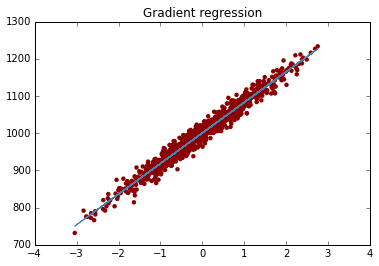

In [9]:
closed_form_best_thetas = np.linalg.pinv(np.dot(X.T, X)).dot(X.T).dot(y)
plt.scatter(X[:, 1], y, color='darkred', edgecolor='none')
plt.plot(X[:, 1], np.dot(X, closed_form_best_thetas), color='steelblue')
plt.title('Gradient regression')

Linear regression is an excellent first approach for many problems - simple to implement, fast, and often good enough to get the job done! For an example of using linear regression in [sklearn](http://scikit-learn.org/stable/), follow this [link](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#example-linear-model-plot-ols-py)

kk